# Exercise 2

In this notebook we dived in the linear regression algorithm, using its closed solution.\
Then, we used polynomial features to help us transpose the data to fit more complex curves to the data.

### Setup

First, we will import some important packages in order to analyze the data throughout the exercise.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

c:\Users\OmriG\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Question 2

Before we applied the Linear Regression, we had implemented it ourselves.\
Our class contains a few essential methods including 'fit', 'predict' and 'score', which will tell us the coefficient of determination.

In [2]:
class LinearRegression:

    def __init__(self, bias=True):
        self.bias = bias
        self.weights = np.zeros(0)

    def fit(self, X, y):
        # Add bias if needed
        Xa = np.c_[X, np.ones(X.shape[0])] if self.bias else X

        # Calculate optimal weights
        self.weights = (np.linalg.pinv(Xa.T @ Xa)) @ Xa.T @ y

        return self

    def predict(self, X):
        # Add bias if needed
        Xa = np.c_[X, np.ones(X.shape[0])] if self.bias else X

        # Calculate predictions
        return Xa @ self.weights

    def score(self, X, y):
        # Calculate the coefficient of determination
        u = ((y - self.predict(X)) ** 2).sum()
        v = ((y - y.mean()) ** 2).sum()
        return 1 - (u / v)

### Question 3

One last preparation was to create our own 'train_test_split' method in order to have a better control over the test size and random state.

In [3]:
# Proxy function to control test size and random state
def my_train_test_split(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

First use of our Linear Regression was on the simple_regression data that was provided to us.

In [4]:
def simple_regression():

    # Load and prepare data
    dataset = pd.read_csv("simple_regression.csv")
    X, y = dataset['x'], dataset['y']
    X_train, X_test, y_train, y_test = my_train_test_split(X, y)

    # Fit linear regression to the data
    linreg = LinearRegression().fit(X_train, y_train)

    # Print results
    print(f'weights: {linreg.weights}')
    print(f'train score: {linreg.score(X_train, y_train)}')
    print(f'test score: {linreg.score(X_test, y_test)}')

simple_regression()

weights: [ 1.54984427 10.01669245]
train score: 0.9916151407161646
test score: 0.9910862827942997


### Question 4

Then, we tried to predict california housing prices using scikit-learn's dataset.

In [5]:
def predict_housing_prices():

     # Load and prepare data
    X, y = fetch_california_housing(return_X_y=True)
    X_train, X_test, y_train, y_test = my_train_test_split(X, y)

    # Fit linear regression to the data
    linreg = LinearRegression().fit(X_train, y_train)

    # Print results
    print(f'weights: {linreg.weights}')
    print(f'train score: {linreg.score(X_train, y_train)}')
    print(f'test score: {linreg.score(X_test, y_test)}')  

predict_housing_prices()

weights: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01
 -3.70232777e+01]
train score: 0.6125511913966952
test score: 0.5757877060338069


### Question 5

Last, we tried to predict Mars graduate wages according to another dataset that was provided to us.\
This time, we were not satisfied with only our raw features, and created polynomial features.\
We ran a few training setups, experimenting different polynomial degrees.


--- evaluating polynomial dergee 1
train score: 0.8964696036840755
test score: 0.7339746996035298

--- evaluating polynomial dergee 2
train score: 0.9996726612512669
test score: 0.9995733415584608

--- evaluating polynomial dergee 3
train score: 0.9953644552677052
test score: 0.9483068265900705

--- evaluating polynomial dergee 4
train score: 0.9082514187357021
test score: 0.472093479796338

--- evaluating polynomial dergee 5
train score: 0.7345455749221129
test score: -0.27331584084188765


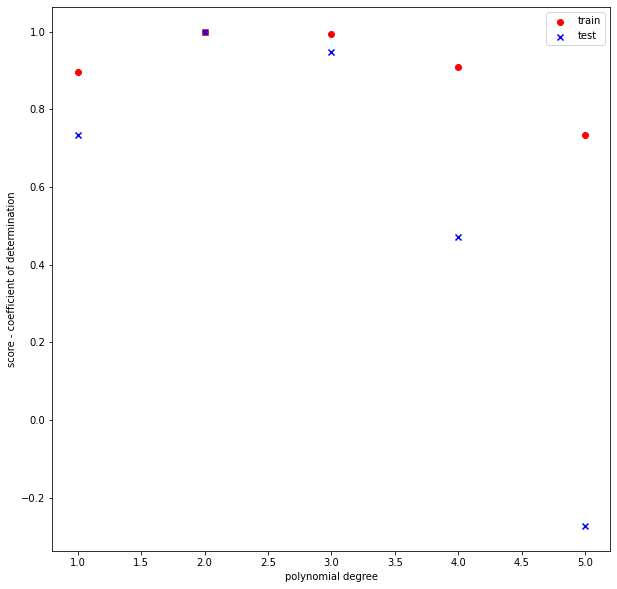

In [6]:
def predict_mars_graduate_wages():

    # Load data
    dataset = pd.read_csv("Students_on_Mars.csv")
    X, y = dataset.drop(columns=['y']), dataset['y']

    # Iterate over degree range
    results = {}
    for d in range(1, 6):

        print(f'\n--- evaluating polynomial dergee {d}')
        
        # Transforming the data using polynomial features
        Z = PolynomialFeatures(d).fit_transform(X)
        Z_train, Z_test, y_train, y_test = my_train_test_split(Z, y)

        # Fit linear regression to the data
        linreg = LinearRegression(bias=False).fit(Z_train, y_train)
        
        # Print results
        print(f'train score: {linreg.score(Z_train, y_train)}')
        print(f'test score: {linreg.score(Z_test, y_test)}') 

        # Store results to plot later
        results[d] = (linreg.score(Z_train, y_train), linreg.score(Z_test, y_test))

    # Plot results
    plt.figure(figsize=(10,10))
    plt.scatter(x=results.keys(), y=list(zip(*results.values()))[0], color='r', label="train")
    plt.scatter(x=results.keys(), y=list(zip(*results.values()))[1], color='b', label="test", marker='x')
    plt.legend()
    plt.xlabel('polynomial degree')
    plt.ylabel('score - coefficient of determination')

predict_mars_graduate_wages()

According to our experiment, we can conclude that for the Mars Graduate Students dataset, the best polynomial degree was 2.